<a href="https://colab.research.google.com/github/K1ngHungry/DataScienceClub/blob/main/Video%20Game%20Sales/VideoGames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
if(!require('pacman')) {install.packages('pacman')} #if else statement
pacman::p_load(ISLR, readxl, tidyverse, magrittr, dplyr, ggplot2, ggrepel)

In [51]:
data <- read.csv('https://raw.githubusercontent.com/K1ngHungry/DataScienceClub/main/Video%20Game%20Sales/vgsales.csv')
data

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [52]:
names(data)

[1] "Rank"         "Name"         "Platform"     "Year"         "Genre"       
 [6] "Publisher"    "NA_Sales"     "EU_Sales"     "JP_Sales"     "Other_Sales" 
[11] "Global_Sales"

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [53]:
summary(data)

      Rank           Name             Platform             Year          
 Min.   :    1   Length:16598       Length:16598       Length:16598      
 1st Qu.: 4151   Class :character   Class :character   Class :character  
 Median : 8300   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 8301                                                           
 3rd Qu.:12450                                                           
 Max.   :16600                                                           
    Genre            Publisher            NA_Sales          EU_Sales      
 Length:16598       Length:16598       Min.   : 0.0000   Min.   : 0.0000  
 Class :character   Class :character   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Mode  :character   Mode  :character   Median : 0.0800   Median : 0.0200  
                                       Mean   : 0.2647   Mean   : 0.1467  
                                       3rd Qu.: 0.2400   3rd Qu.: 0.1100  
                                

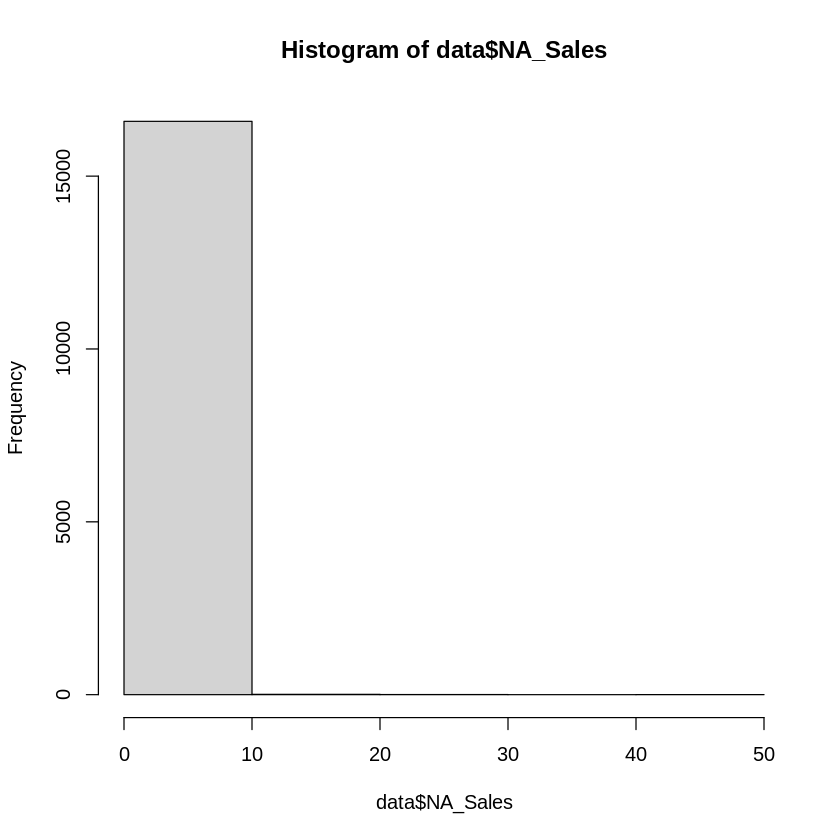

In [54]:
hist(data$NA_Sales, breaks=5)

In [55]:
data2 <- data %>% filter(data$NA_Sales >= 0.05)
data2 <- data2 %>% filter(data2$EU_Sales >= 0.05)
data2 <- data2 %>% filter(data2$JP_Sales >= 0.05)
data2 <- data2 %>% filter(data2$Other_Sales >= 0.05)
data2 <- data2 %>% filter(data2$Global_Sales >= 0.05)
data2

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


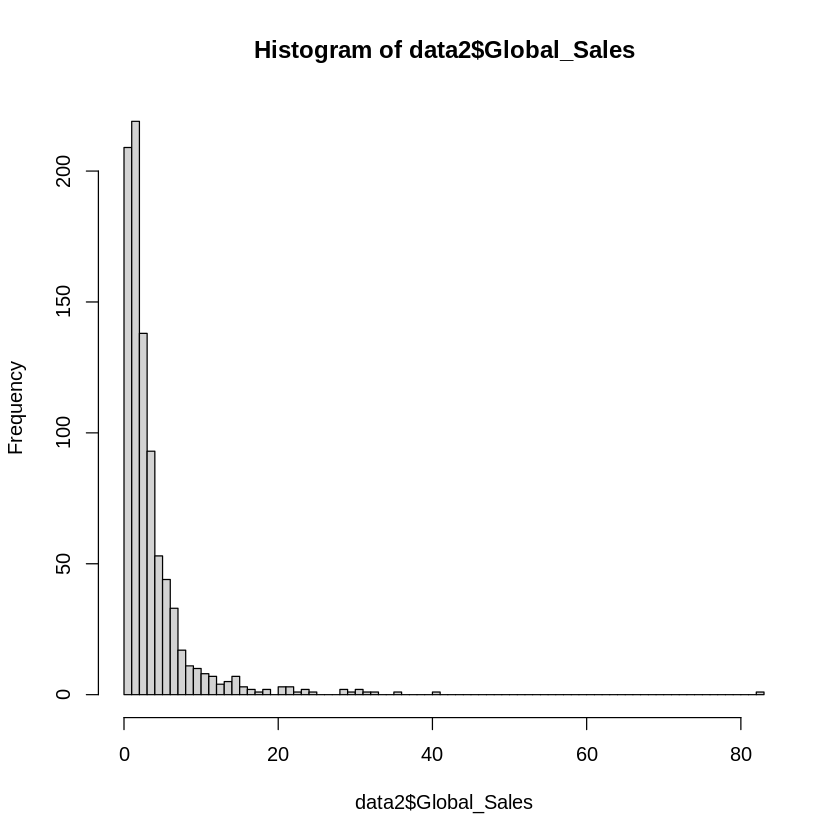

In [56]:
hist(data2$Global_Sales, breaks = 100)

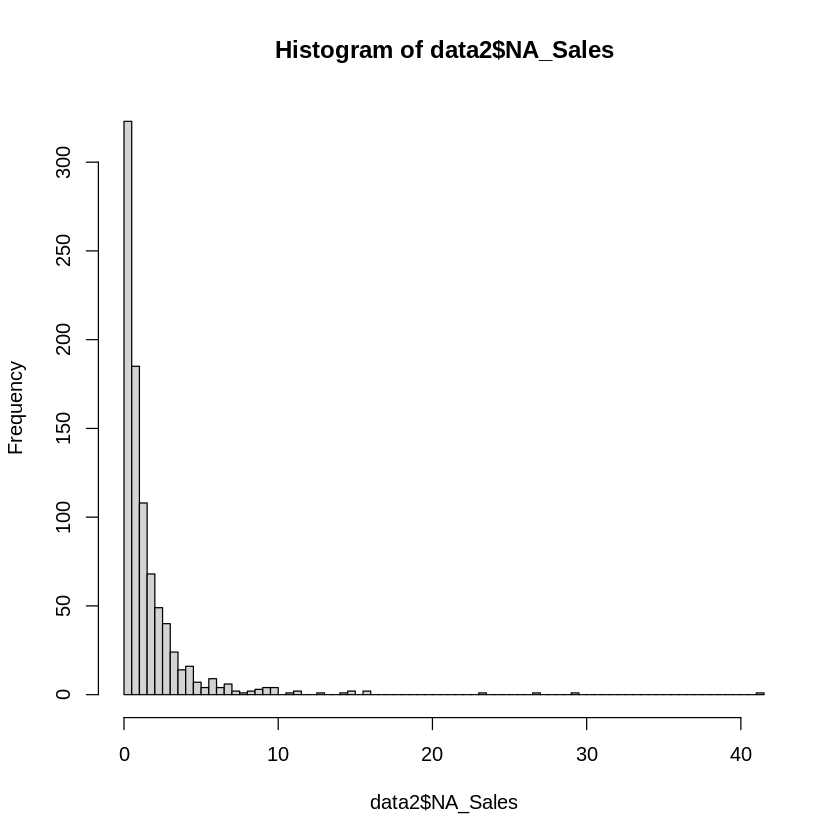

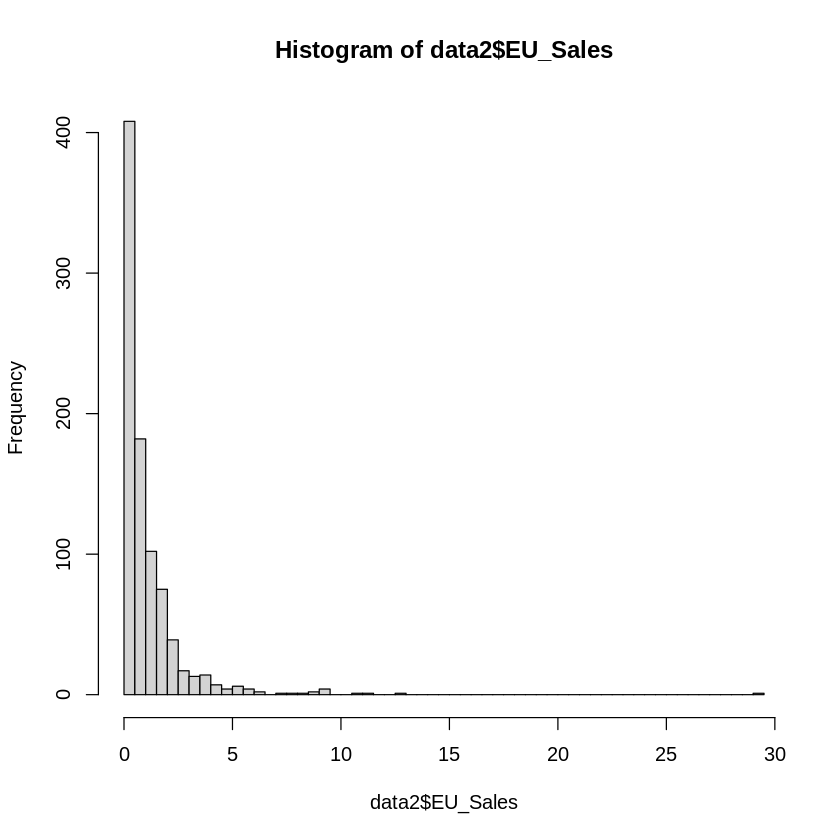

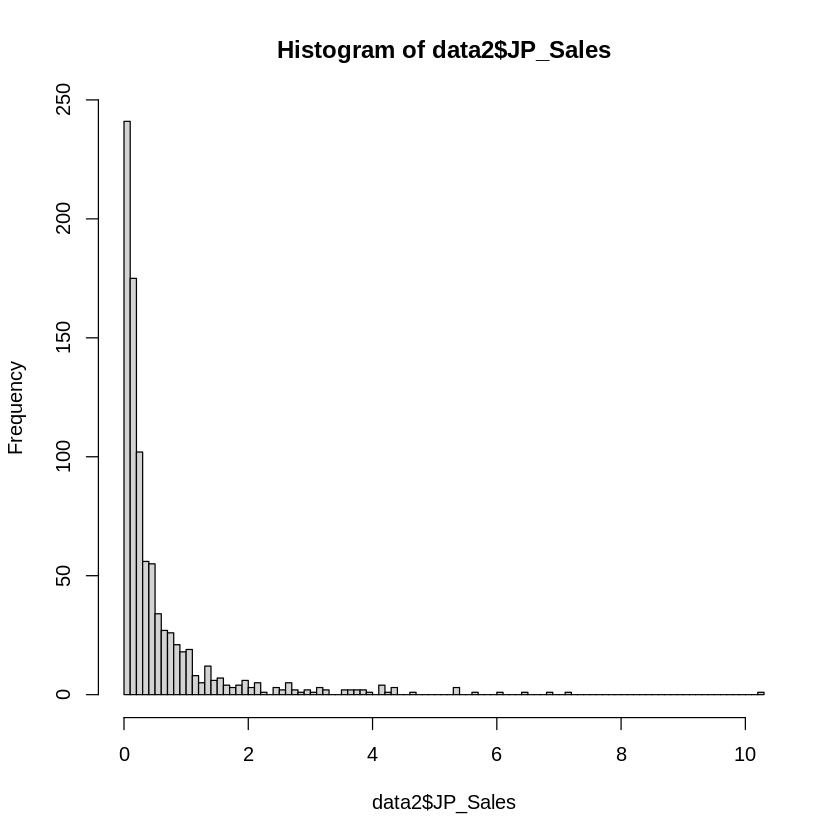

In [57]:
hist(data2$NA_Sales, breaks=100)
hist(data2$EU_Sales, breaks=100)
hist(data2$JP_Sales, breaks=100)

Warning message:
“ggrepel: 844 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


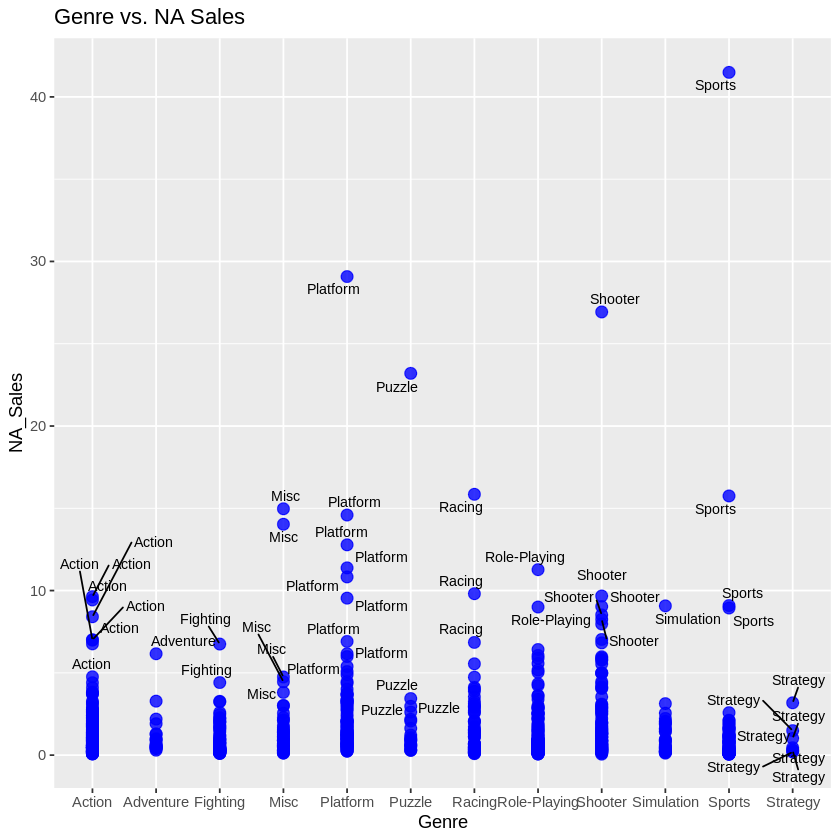

In [58]:
data2 %>%
  ggplot(aes(x = Genre, y = NA_Sales)) + 
  # geometric options: color, size, shape, alpha: transparency (range: 0 to 1)
  geom_point(color = "blue", size= 3, alpha = .8) + 
  geom_text_repel(aes(label = Genre), size = 3) +
  labs(title = "Genre vs. NA Sales", 
       x = "Genre", 
       y = "NA_Sales")

Warning message:
“ggrepel: 886 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


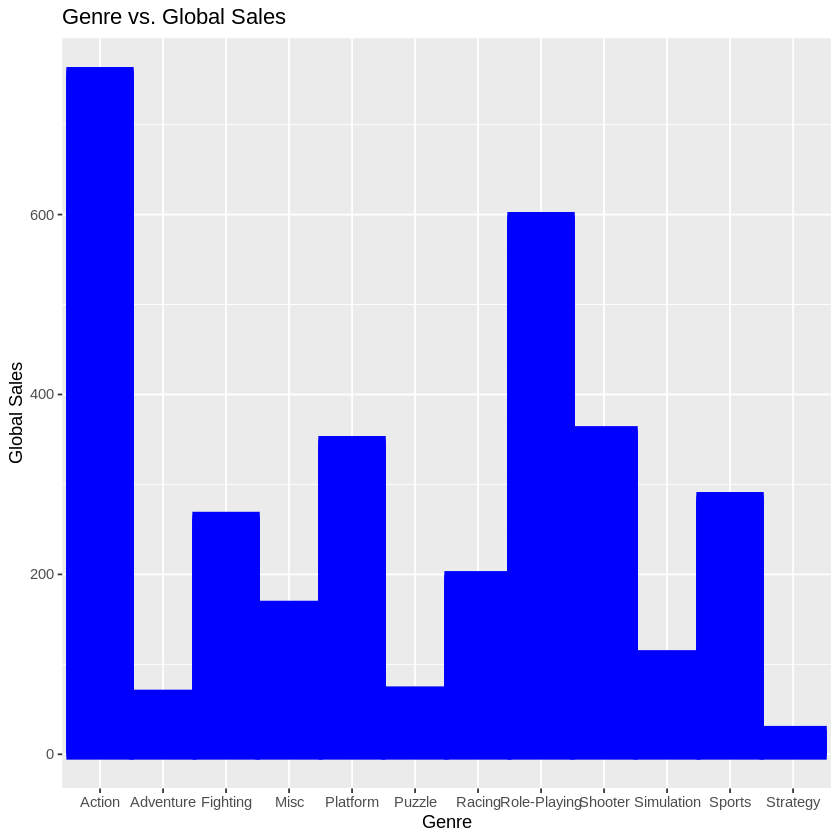

In [60]:
data2 %>%
  ggplot(aes(x = Genre, y = mean(Global_Sales))) +
  geom_col(color = "blue", size= 3, alpha = .8) + 
  geom_text_repel(aes(label = Genre), size = 3) +
  labs(title = "Genre vs. Global Sales", 
       x = "Genre", 
       y = "Global Sales")